# Compito robotica fine anno

In [90]:
import pandas as pd

# Carica il dataset
df = pd.read_csv("Pokemon.csv")

# Stampa il DataFrame
print(df)


     Unnamed: 0                    abilities  against_bug  against_dark  \
0             0  ['Overgrow', 'Chlorophyll']         1.00           1.0   
1             1  ['Overgrow', 'Chlorophyll']         1.00           1.0   
2             2  ['Overgrow', 'Chlorophyll']         1.00           1.0   
3             3     ['Blaze', 'Solar Power']         0.50           1.0   
4             4     ['Blaze', 'Solar Power']         0.50           1.0   
..          ...                          ...          ...           ...   
792         795              ['Beast Boost']         1.00           1.0   
793         796              ['Beast Boost']         0.25           1.0   
794         798              ['Beast Boost']         2.00           0.5   
795         799              ['Prism Armor']         2.00           2.0   
796         800               ['Soul-Heart']         0.25           0.5   

     against_dragon  against_electric  against_fairy  against_fight  \
0               1.0         

In [72]:


# Conta quanti Pokémon sono leggendari
numero_legendari = df["is_legendary"].sum()

# Stampa il numero di Pokémon leggendari
print("Il numero di Pokémon leggendari nel dataset è:", numero_legendari)


Il numero di Pokémon leggendari nel dataset è: 67


# Confronto Attacco  tra Pokemon

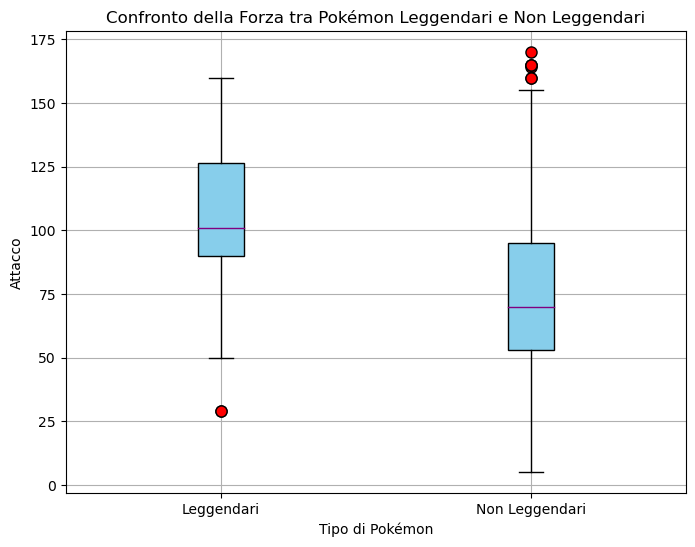

In [73]:
import pandas as pd
import matplotlib.pyplot as plt



# Filtra i dati per Pokémon leggendari e non leggendari
legendary_df = df[df["is_legendary"] == 1]
non_legendary_df =df[df["is_legendary"] == 0]

# Crea un boxplot per confrontare la forza dei due gruppi
plt.figure(figsize=(8, 6))
plt.boxplot([legendary_df["attack"], non_legendary_df["attack"]],
            labels=["Leggendari", "Non Leggendari"],
            patch_artist=True,  # Abilita il riempimento dei boxplot
            boxprops=dict(facecolor="skyblue"),  # Colore dei boxplot
            medianprops=dict(color="purple"),  # Colore della mediana
            flierprops=dict(marker="o", markerfacecolor="red", markersize=8))  # Colore degli outlier
plt.xlabel("Tipo di Pokémon")
plt.ylabel("Attacco")
plt.title("Confronto della Forza tra Pokémon Leggendari e Non Leggendari")
plt.grid(True)
plt.show()


#  Eliminazione outlier

In [74]:
import pandas as pd

# Carica il dataset dei Pokémon
df = pd.read_csv("Pokemon.csv")  # Assicurati di sostituire "Pokemon.csv" con il nome effettivo del tuo file

# Calcola la media e la deviazione standard per l'attributo "attack"
feature = "attack"
mean_value = df[feature].mean()
std_dev = df[feature].std()

# Definisci il valore k per identificare gli outlier
k = 2

# Identifica gli outlier utilizzando la riga di codice fornita
outliers = (df[feature] < (mean_value - k * std_dev)) | (df[feature] > (mean_value + k * std_dev))

# Rimuovi gli outlier dal DataFrame originale
df = df[~outliers]

# Stampa il numero di righe rimosse
print("Numero di outliers rimossi:", outliers.sum())


Numero di outliers rimossi: 31


In [91]:
# Filtra i dati per Pokémon leggendari
legendary_df = df[df["is_legendary"] == 1]

# Trova l'indice del Pokémon leggendario con il valore minimo per l'attributo "attack"
weakest_legendary_index = legendary_df["attack"].idxmin()

# Ottieni il nome del Pokémon leggendario più debole
weakest_legendary_name = df.loc[weakest_legendary_index, "name"]

print("Il Pokémon leggendario più debole è:", weakest_legendary_name)


Il Pokémon leggendario più debole è: Cosmog


In [76]:
# Rimuovi i Pokémon 
df = df[df["name"] != "Cosmog"]

df = df[df["name"] != "Cosmoem"]

In [77]:
df.shape

(764, 43)

# Confronto Attacco  tra Pokemon (senza outlier)

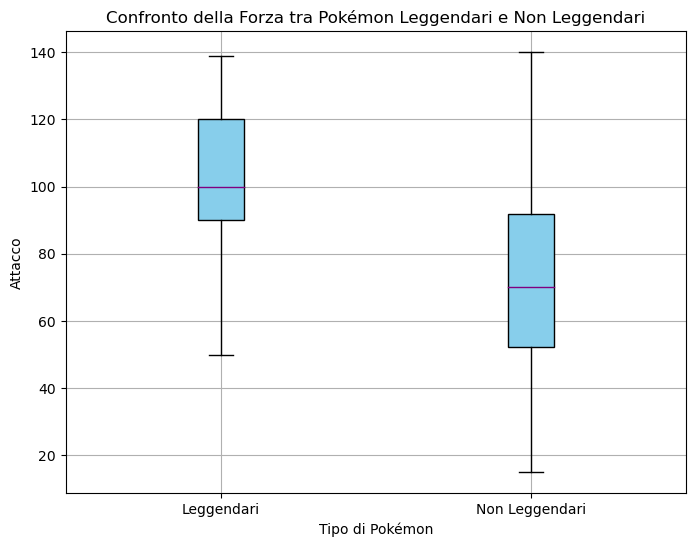

In [78]:
import pandas as pd
import matplotlib.pyplot as plt



# Filtra i dati per Pokémon leggendari e non leggendari
legendary_df = df[df["is_legendary"] == 1]
non_legendary_df =df[df["is_legendary"] == 0]

# Crea un boxplot per confrontare la forza dei due gruppi
plt.figure(figsize=(8, 6))
plt.boxplot([legendary_df["attack"], non_legendary_df["attack"]],
            labels=["Leggendari", "Non Leggendari"],
            patch_artist=True,  # Abilita il riempimento dei boxplot
            boxprops=dict(facecolor="skyblue"),  # Colore dei boxplot
            medianprops=dict(color="purple"),  # Colore della mediana
            flierprops=dict(marker="o", markerfacecolor="red", markersize=8))  # Colore degli outlier

plt.xlabel("Tipo di Pokémon")
plt.ylabel("Attacco")
plt.title("Confronto della Forza tra Pokémon Leggendari e Non Leggendari")
plt.grid(True)
plt.show()



# Classifica migliori pokemon

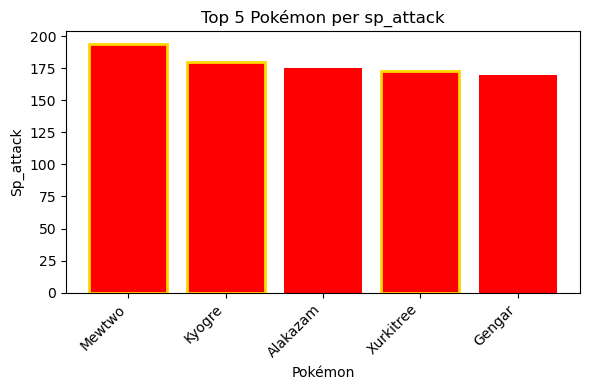

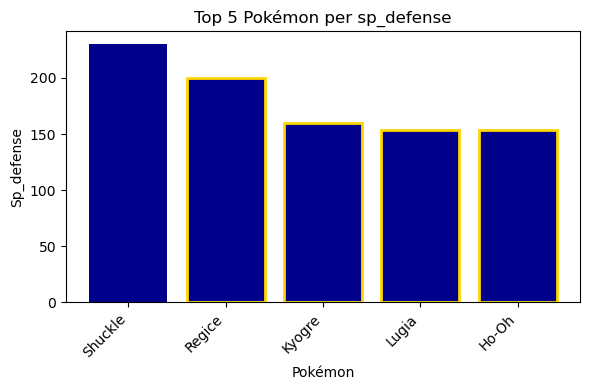

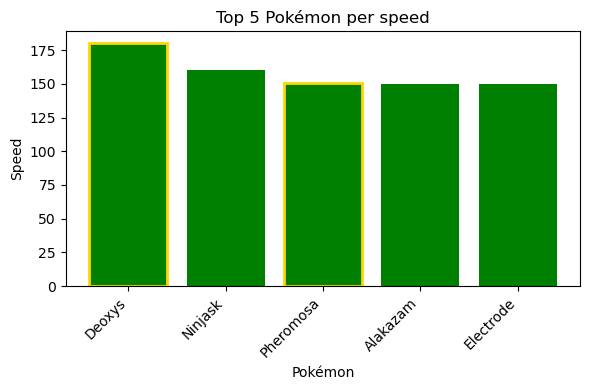

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un dizionario vuoto per memorizzare i migliori 5 Pokémon per ogni parametro
top_pokemon = {}

# Calcola i migliori 5 Pokémon per ogni parametro
top_pokemon['sp_attack'] = df.nlargest(5, 'sp_attack')
top_pokemon['sp_defense'] = df.nlargest(5, 'sp_defense')
top_pokemon['speed'] = df.nlargest(5, 'speed')

# Imposta i colori per ciascuna caratteristica
colori = {'sp_attack': 'red', 'sp_defense': 'darkblue', 'speed': 'green'}

# Crea un grafico per ogni parametro
for parametro, pokemon in top_pokemon.items():
    # Aggiungi una colonna per indicare se il Pokémon è leggendario o meno
    pokemon['is_legendary'] = pokemon['is_legendary'].map({0: 'Non leggendario', 1: 'Leggendario'})
    
    plt.figure(figsize=(6, 4))
    plt.bar(pokemon['name'], pokemon[parametro], color=colori[parametro], edgecolor=pokemon['is_legendary'].map({'Leggendario': 'gold', 'Non leggendario': 'none'}), linewidth=pokemon['is_legendary'].map({'Leggendario': 2, 'Non leggendario': 0}))
    plt.title(f'Top 5 Pokémon per {parametro}')
    plt.xlabel('Pokémon')
    plt.ylabel(parametro.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


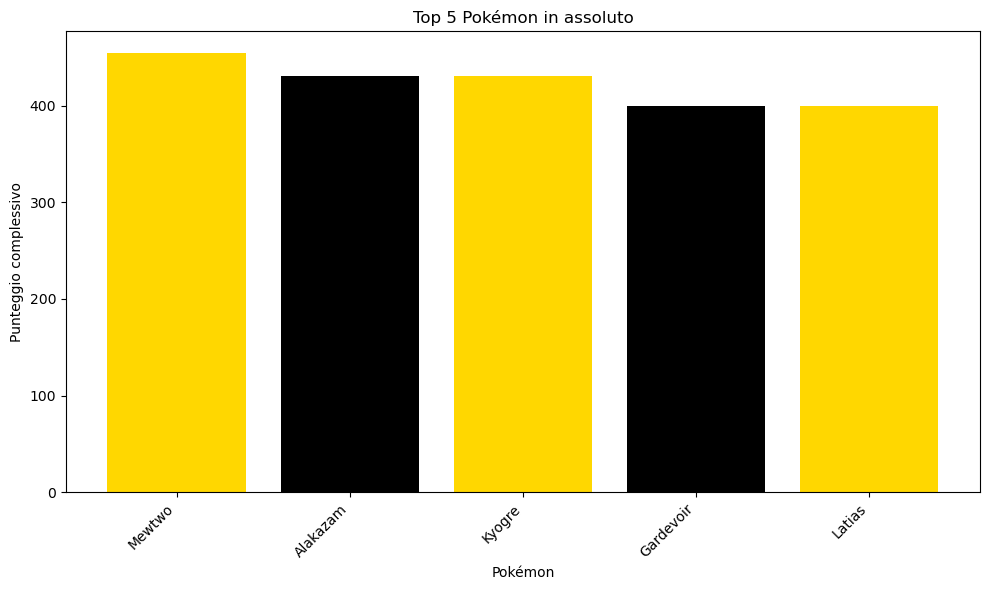

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcola il punteggio complessivo per ogni Pokémon
df['overall_score'] = df['sp_attack'] + df['sp_defense'] + df['speed']

# Aggiungi una colonna per indicare se il Pokémon è leggendario o meno
df['is_legendary'] = df['is_legendary'].map({0: 'Non leggendario', 1: 'Leggendario'})

# Seleziona i 5 Pokémon con il punteggio complessivo più alto
top_pokemon = df.nlargest(5, 'overall_score')

# Imposta i colori per ciascun tipo di Pokémon
colori = {'Leggendario': 'gold', 'Non leggendario': 'black'}

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.bar(top_pokemon['name'], top_pokemon['overall_score'], color=top_pokemon['is_legendary'].map(colori))
plt.title('Top 5 Pokémon in assoluto')
plt.xlabel('Pokémon')
plt.ylabel('Punteggio complessivo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Correlazione tra peso e caratteristiche


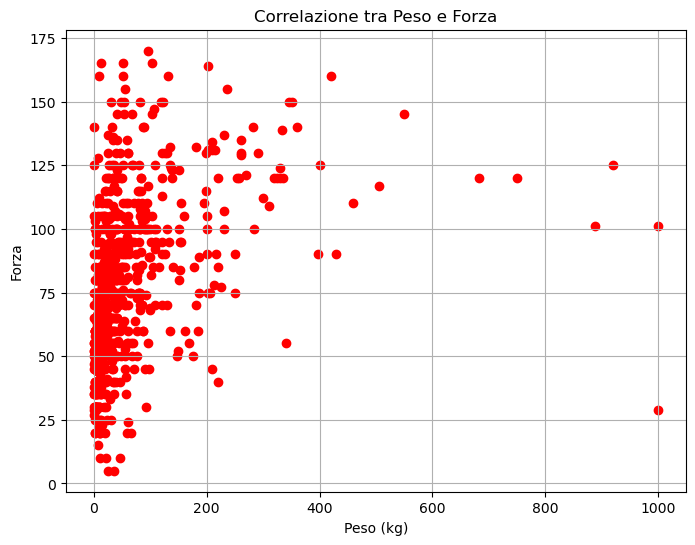

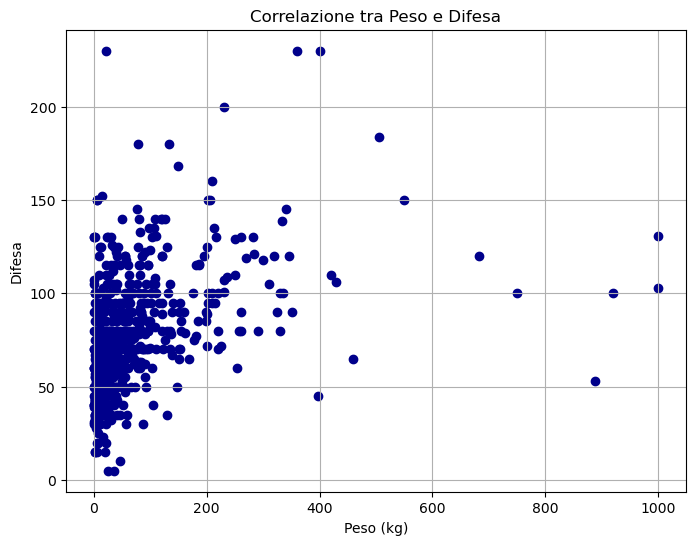

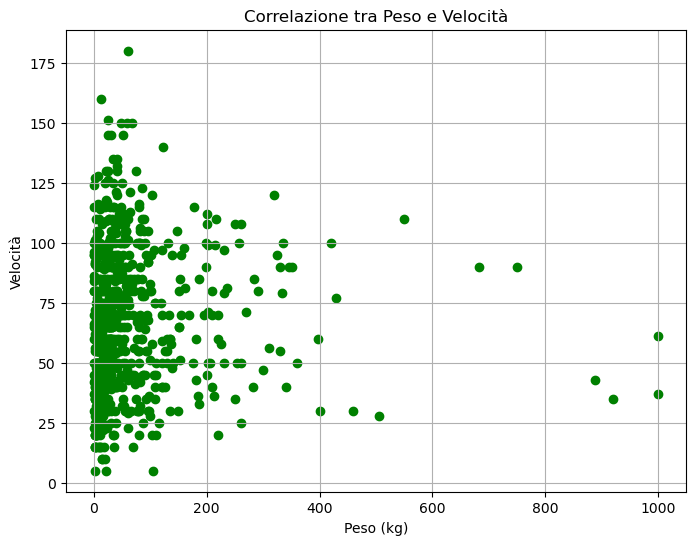

Correlazione tra Peso e Forza: 0.37241541307698006
Correlazione tra Peso e Difesa: 0.41680949822908664
Correlazione tra Peso e Velocità: 0.043071914817405674


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv("Pokemon.csv")

# Rimuovi le righe con valori mancanti nel peso o nelle statistiche
df = df.dropna(subset=['weight_kg', 'attack', 'defense', 'speed'])

# Crea un grafico a dispersione per visualizzare la correlazione tra peso e forza
plt.figure(figsize=(8, 6))
plt.scatter(df['weight_kg'], df['attack'], color='red')
plt.title('Correlazione tra Peso e Forza')
plt.xlabel('Peso (kg)')
plt.ylabel('Forza')
plt.grid(True)
plt.show()

# Crea un grafico a dispersione per visualizzare la correlazione tra peso e difesa
plt.figure(figsize=(8, 6))
plt.scatter(df['weight_kg'], df['defense'], color='darkblue')
plt.title('Correlazione tra Peso e Difesa')
plt.xlabel('Peso (kg)')
plt.ylabel('Difesa')
plt.grid(True)
plt.show()

# Crea un grafico a dispersione per visualizzare la correlazione tra peso e velocità
plt.figure(figsize=(8, 6))
plt.scatter(df['weight_kg'], df['speed'], color='green')
plt.title('Correlazione tra Peso e Velocità')
plt.xlabel('Peso (kg)')
plt.ylabel('Velocità')
plt.grid(True)
plt.show()

# Calcola e stampa il coefficiente di correlazione di Pearson per ogni coppia di variabili
print("Correlazione tra Peso e Forza:", df['weight_kg'].corr(df['attack']))
print("Correlazione tra Peso e Difesa:", df['weight_kg'].corr(df['defense']))
print("Correlazione tra Peso e Velocità:", df['weight_kg'].corr(df['speed']))


# Addestramento algoritmo

# Modello SVM


In [81]:
# Importa le librerie necessarie
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# Elimina le righe con valori mancanti
df = df.dropna()

# Converte le colonne categoriche in numeriche
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Definisci le variabili indipendenti e dipendenti
X = df.drop('is_legendary', axis=1)
y = df['is_legendary']

# Crea il modello SVM
model = SVC()

# Definisci il numero di fold
num_folds = 10

# Crea l'oggetto KFold
kf = KFold(n_splits=num_folds)

scores = []

# Esegui la cross-validation K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

# Calcola la media dei punteggi di cross-validation
average_score = sum(scores) / num_folds

print(f'Punteggi di cross-validation: {scores}')
print(f'Media dei punteggi di cross-validation: {average_score}')


Punteggi di cross-validation: [1.0, 1.0, 1.0, 1.0, 0.9375, 0.96875, 1.0, 0.96875, 1.0, 1.0]
Media dei punteggi di cross-validation: 0.9875


# Modello DECISIONTREE

In [82]:
# Importa le librerie necessarie
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# Elimina le righe con valori mancanti
df = df.dropna()

# Converte le colonne categoriche in numeriche
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Definisci le variabili indipendenti e dipendenti
X = df.drop('is_legendary', axis=1)
y = df['is_legendary']

# Crea il modello di albero decisionale
model = DecisionTreeClassifier()

# Definisci il numero di fold
num_folds = 10

# Crea l'oggetto KFold
kf = KFold(n_splits=num_folds)

scores = []

# Esegui la cross-validation K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

# Calcola la media dei punteggi di cross-validation
average_score = sum(scores) / num_folds

print(f'Punteggi di cross-validation: {scores}')
print(f'Media dei punteggi di cross-validation: {average_score}')


Punteggi di cross-validation: [1.0, 1.0, 1.0, 1.0, 1.0, 0.96875, 1.0, 1.0, 1.0, 1.0]
Media dei punteggi di cross-validation: 0.996875


#  Modello RANDOM FOREST

In [83]:
# Importa le librerie necessarie
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# Elimina le righe con valori mancanti
df = df.dropna()

# Converte le colonne categoriche in numeriche
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Definisci le variabili indipendenti e dipendenti
X = df.drop('is_legendary', axis=1)
y = df['is_legendary']

# Crea il modello Random Forest
model =RandomForestClassifier(n_estimators=100)

# Definisci il numero di fold
num_folds = 5

# Crea l'oggetto KFold
kf = KFold(n_splits=num_folds)

scores = []

# Esegui la cross-validation K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

# Calcola la media dei punteggi di cross-validation
average_score = sum(scores) / num_folds

print(f'Punteggi di cross-validation: {scores}')
print(f'Media dei punteggi di cross-validation: {average_score}')


Punteggi di cross-validation: [1.0, 1.0, 0.9538461538461539, 0.9846153846153847, 1.0]
Media dei punteggi di cross-validation: 0.9876923076923078


# Modello LOGISTCREGRESSION

In [84]:
# Importa le librerie necessarie
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Elimina le righe con valori mancanti
df = df.dropna()

# Converte le colonne categoriche in numeriche
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Definisci le variabili indipendenti e dipendenti
X = df.drop('is_legendary', axis=1)
y = df['is_legendary']

# Assicurati che y abbia gli stessi indici di X
y.index = X.index

# Scala i dati
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Crea il modello di Regressione Logistica con un numero maggiore di iterazioni
model = LogisticRegression(max_iter=1000)

# Definisci il numero di fold
num_folds = 10

# Crea l'oggetto KFold
kf = KFold(n_splits=num_folds)

scores = []

# Esegui la cross-validation K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

# Calcola la media dei punteggi di cross-validation
average_score = sum(scores) / num_folds

print(f'Punteggi di cross-validation: {scores}')
print(f'Media dei punteggi di cross-validation: {average_score}')


Punteggi di cross-validation: [1.0, 1.0, 1.0, 1.0, 1.0, 0.96875, 1.0, 1.0, 1.0, 1.0]
Media dei punteggi di cross-validation: 0.996875


# RETI NEURALI 

In [86]:
# Importa le librerie necessarie
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import numpy as np



# Elimina le righe con valori mancanti
df = df.dropna()

# Converte le colonne categoriche in numeriche
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Definisci le variabili indipendenti e dipendenti
X = df.drop('is_legendary', axis=1)
y = df['is_legendary']

# Assicurati che y abbia gli stessi indici di X
y.index = X.index

# Scala i dati
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definisci il numero di fold
num_folds = 5

# Crea l'oggetto KFold
kf = KFold(n_splits=num_folds)

scores = []

# Esegui la cross-validation K-Fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Crea il modello di rete neurale
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compila il modello
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Addestra il modello
    model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

    # Valuta il modello
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    scores.append(accuracy)

    # Stampa l'accuratezza del modello per ogni fold
    print(f'Accuratezza per il fold corrente: {accuracy*100}')

# Calcola la media dei punteggi di cross-validation
average_score = np.mean(scores)

print(f'Punteggi di cross-validation: {scores}')
print(f'Media dei punteggi di cross-validation: {average_score}')


Accuratezza per il fold corrente: 100.0
Accuratezza per il fold corrente: 100.0
Accuratezza per il fold corrente: 95.38461565971375
Accuratezza per il fold corrente: 100.0
Accuratezza per il fold corrente: 100.0
Punteggi di cross-validation: [1.0, 1.0, 0.9538461565971375, 1.0, 1.0]
Media dei punteggi di cross-validation: 0.9907692313194275


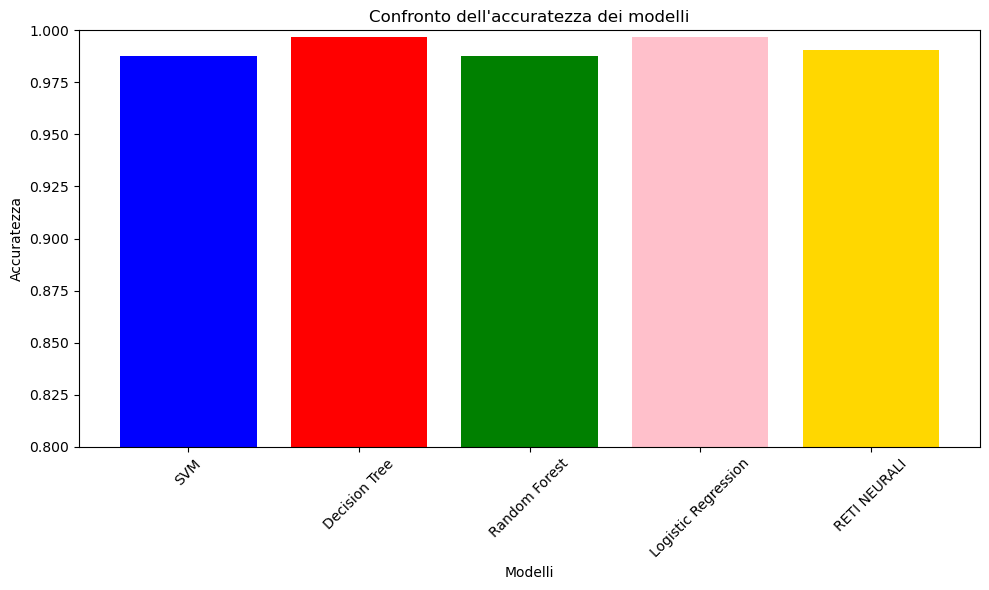

Miglior modello: Decision Tree


In [105]:
import matplotlib.pyplot as plt


accuracies = {
    "SVM": 0.9875,
    "Decision Tree": 0.996875,
    "Random Forest": 0.9876923076923078,
    "Logistic Regression": 0.996875,
    "RETI NEURALI": 0.9907692313194275
}

# Estrai i nomi dei modelli e le relative accuratezze
model_names = list(accuracies.keys())
model_accuracies = list(accuracies.values())

# Crea una palette di colori diversa per ogni modello
colors = ['blue', "red", 'green', 'pink', 'gold']

# Crea il grafico a barre per confrontare le accuratezze dei modelli
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_accuracies, color=colors)

# Identifica il miglior modello
best_model_index = model_accuracies.index(max(model_accuracies))
best_model_name = model_names[best_model_index]
best_model_accuracy = model_accuracies[best_model_index]


plt.title('Confronto dell\'accuratezza dei modelli')
plt.xlabel('Modelli')
plt.ylabel('Accuratezza')
plt.ylim(0.8, 1.0)  # Imposta i limiti sull'asse y per una migliore visualizzazione
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Miglior modello: {best_model_name}')